# Plotting Figure 1 of DynX data
> Domain of linearity of discrete shape derivative for Acoustic Duct

**Info**:
- the data for this figure is build in dynX

Slope: 3.290677735668712e-06


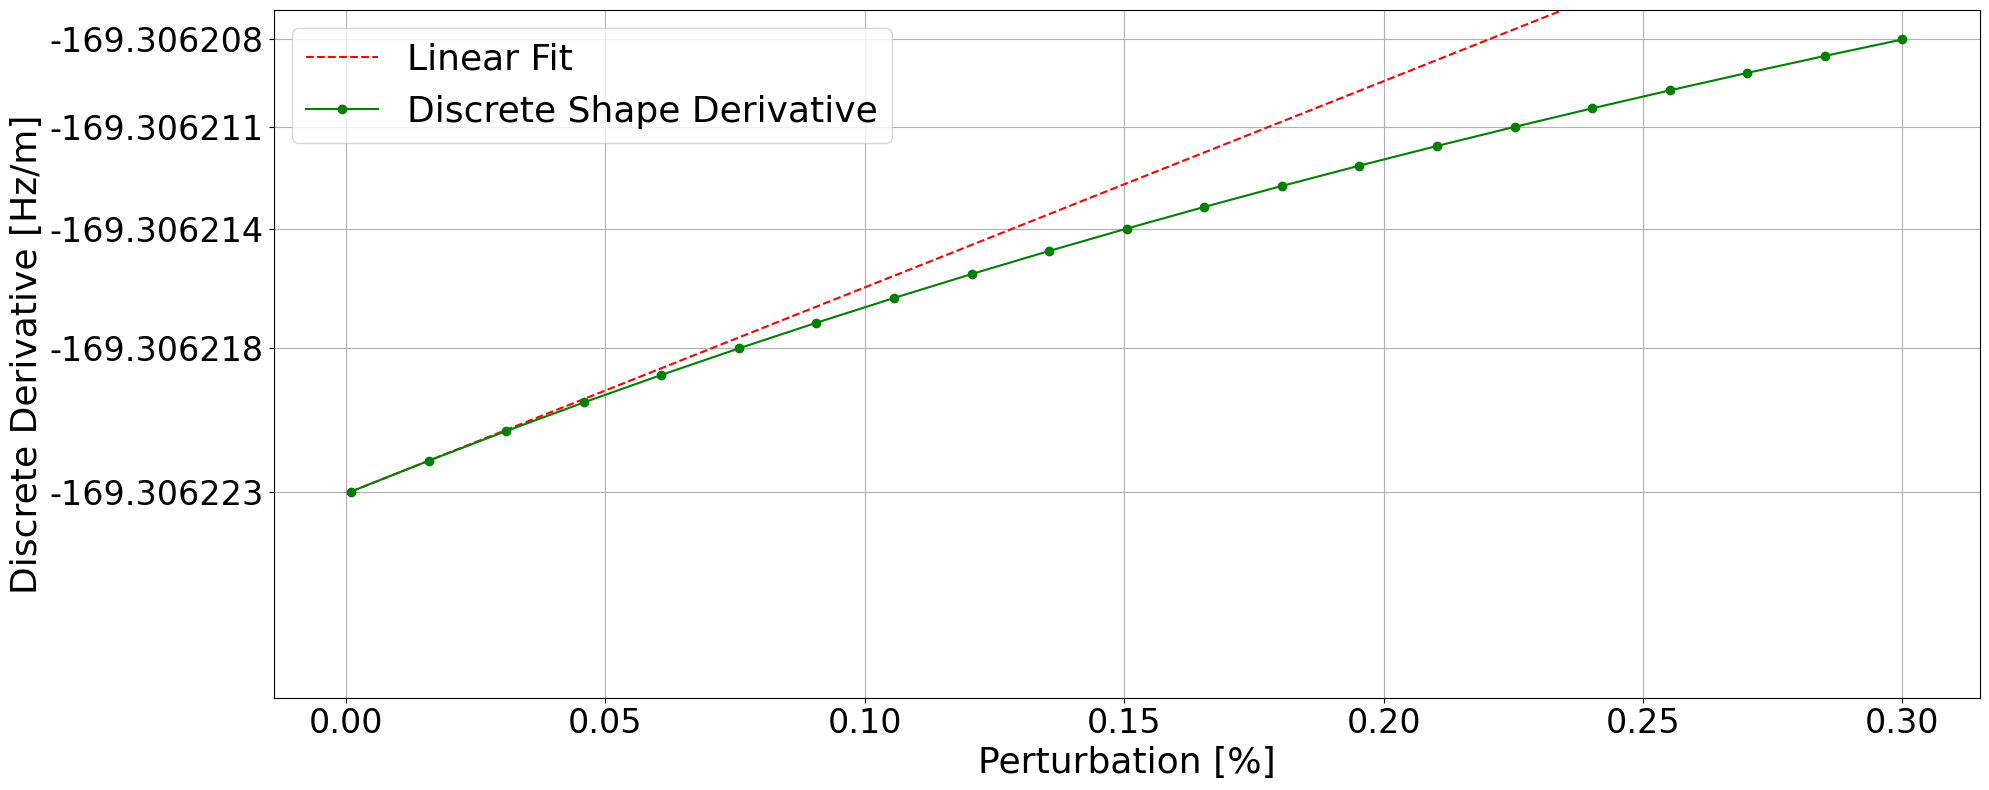

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fontsize = 26
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('dynx_data_fig1.txt')
duct_length = 21.27659574

with open(file, 'r') as f:
    lines = f.readlines()
perturbations = []
discrete_shape_derivatives = []

# read the data from the file
for line in lines[1:]: # skip the first line
    p, der = line.strip().split(',')
    perturbations.append(float(p))
    discrete_shape_derivatives.append(float(der))
# transform the lists into numpy arrays to perform operations
perturbations = np.array(perturbations)

# create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Fit a linear line to the first few data points
# real part
slope, intercept = np.polyfit(perturbations[:2], discrete_shape_derivatives[:2], 1)
linear_fit = slope * perturbations + intercept
print('Slope:', slope)
ax.plot(perturbations/duct_length, linear_fit, 'r--', label='Linear Fit')

# plot the real part of shape derivatives
ax.plot(perturbations/duct_length, discrete_shape_derivatives, color='green', marker='o', label='Discrete Shape Derivative')
# set labels and title
ax.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax.set_ylabel('Discrete Derivative [Hz/m]', fontsize=fontsize)
ax.legend(loc='upper right')
ax.legend(fontsize=fontsize)
ax.grid(True)

plt.ylim(min(discrete_shape_derivatives)-1e-6, max(discrete_shape_derivatives)+7e-6)  # Set y-axis limits based on data
plt.yticks(discrete_shape_derivatives[::5])  # Set specific ticks

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout() # make plot look better
plt.show() # show the plot
